In [1]:
# Application initialization
import mercury as mr

import warnings

warnings.filterwarnings("ignore")

show_code = mr.Checkbox(value=False, label="Show code", url_key="show_code")

app = mr.App(
    title="cGAN Forecasts Visualization",
    description="Visualizing cGAN Forecasts",
    show_code=show_code.value,
)

mercury.Checkbox

mercury.App

In [2]:
from os import getenv
from datetime import datetime
from cgan_ui.utils import get_forecast_data_dates

# from cgan_ui.utils import  print_forecast_info

mask_region = getenv("DEFAULT_MASK", "East Africa")

data_dates = get_forecast_data_dates(source="cgan", mask_region=mask_region)

cgan_date = mr.Select(
    choices=data_dates,
    value=data_dates[0],
    label="Forecast Initialization Date",
    url_key="cgan_date",
)

# print_forecast_info(datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"))

mercury.Select

In [3]:
from cgan_ui.utils import get_data_store_path
from cgan_ui.show_cgan import load_GAN_forecast

store_path = get_data_store_path(source="cgan", mask_region=mask_region)

# Load the GAN forecast
data = load_GAN_forecast(
    forecast_init_date=datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"),
    data_dir=store_path,
    mask_region=mask_region,
)

In [4]:
from cgan_ui.constants import ACCUMULATION_TIME

accumulation_time = mr.Select(
    value=ACCUMULATION_TIME[0],
    choices=ACCUMULATION_TIME,
    label="Accumulation Time",
    url_key="accumulation_time",
)

mercury.Select

In [5]:
from cgan_ui.constants import ACCUMULATION_UNITS

if accumulation_time.value == "6h":
    acc_unit = "mm/6h"
elif accumulation_time.value == "24h":
    acc_unit = "mm/day"
else:
    acc_unit = ACCUMULATION_UNITS[0]

accumulation_units = mr.Select(
    value=acc_unit,
    choices=ACCUMULATION_UNITS,
    label="Accumulation Units",
    url_key="accumulation_units",
)

mercury.Select

In [6]:
from cgan_ui.constants import VALID_TIME_START_HOUR

valid_start_hour = mr.Select(
    value=VALID_TIME_START_HOUR[-1],
    choices=VALID_TIME_START_HOUR,
    label=f"Valid Time Start Hour in {getenv('DEFAULT_TIMEZONE','EAT')}",
    url_key="valid_stat_hour",
)

mercury.Select

In [7]:
from cgan_ui.constants import COUNTRY_NAMES

mask_area = mr.Select(
    choices=COUNTRY_NAMES,
    value=COUNTRY_NAMES[2],
    label="Area of Interest",
    url_key="mask_area",
)

mercury.Select

In [8]:
from cgan_ui.constants import COLOR_SCHEMES

color_style = mr.Select(
    choices=COLOR_SCHEMES,
    value=COLOR_SCHEMES[0],
    label="Visualization Color Style",
    url_key="color_style",
)

mercury.Select

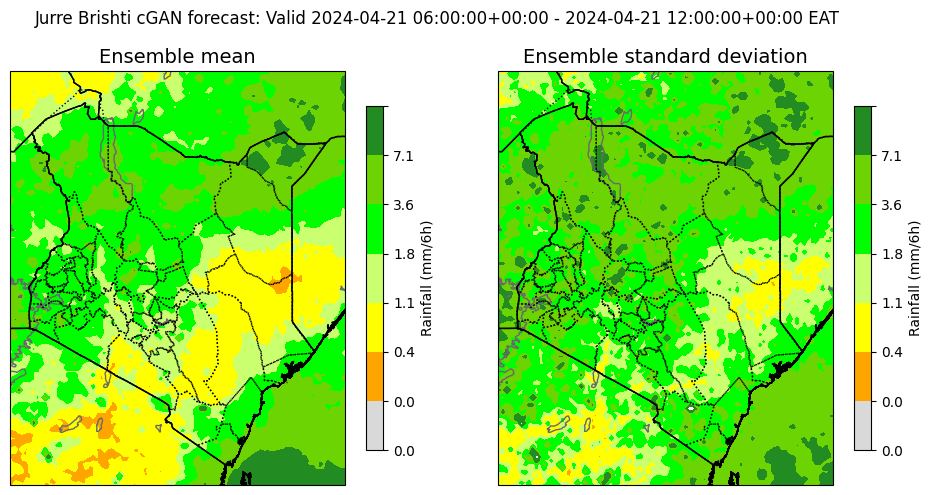

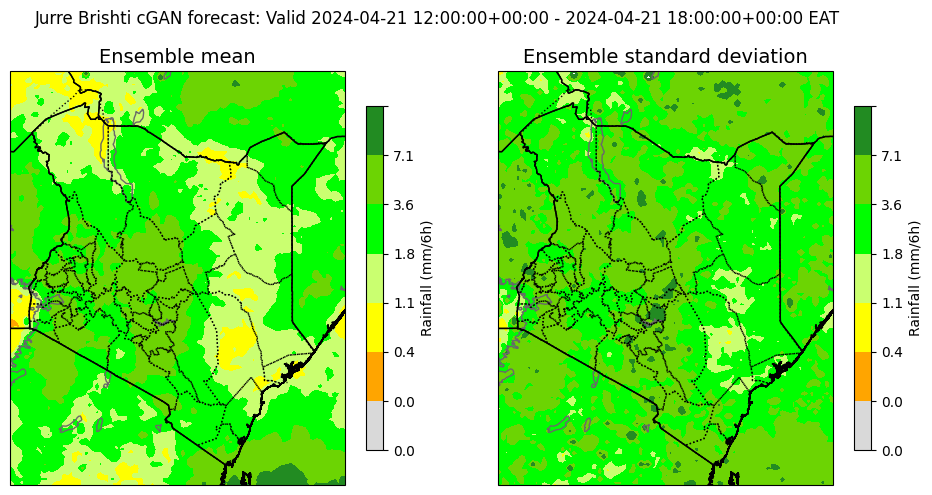

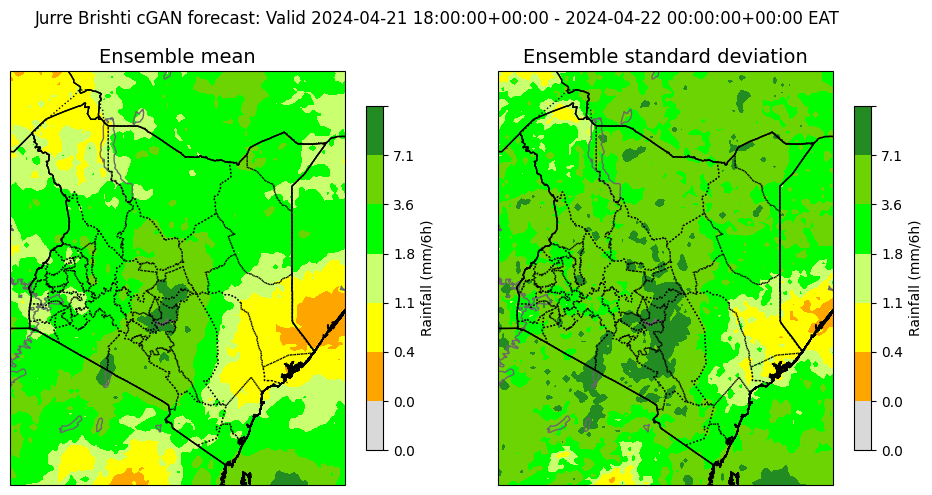

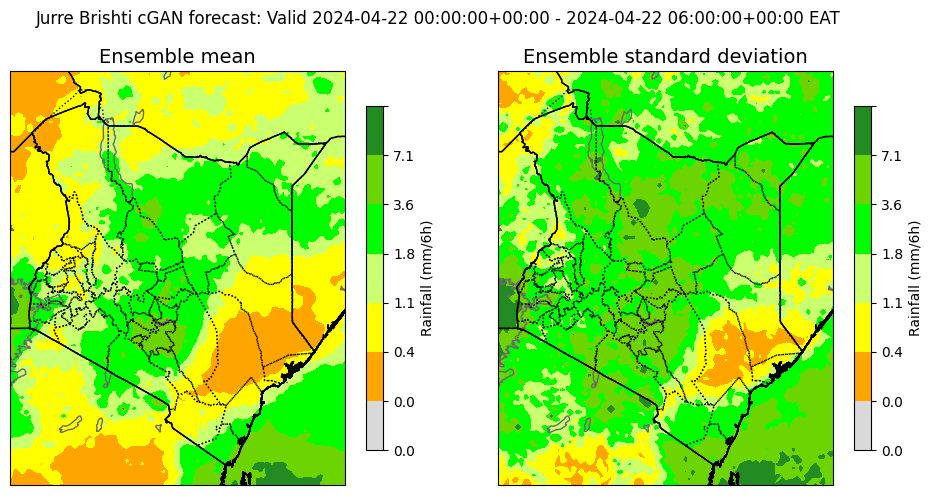

In [9]:
from cgan_ui.show_cgan import plot_GAN_forecast

# Plot the GAN forecast
plot_GAN_forecast(
    data,
    valid_time_start_hour=valid_start_hour.value,
    accumulation_time=accumulation_time.value,
    style=None if color_style.value == "Default" else color_style.value,
    region=mask_area.value,
    plot_units=accumulation_units.value,
)

mercury.Numeric

mercury.Checkbox

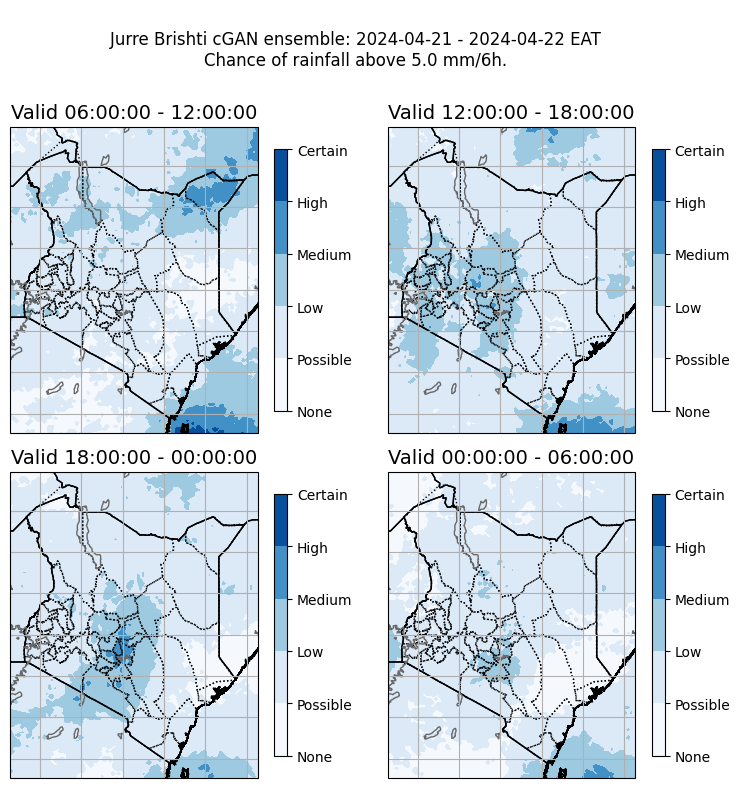

In [10]:
from cgan_ui.show_cgan import plot_GAN_threshold_chance

# Plot the chance of rainfall at a rate above a specified threshold.
#   threshold=2             - We'll plot the chance of rainfall above this threshold rate. The
#                             default is 2 mm/h. The units of threshold is set by plot_units.
#   plot_units='mm/h'       - Can be 'mm/h' (default), 'mm/6h', 'mm/day' or 'mm/week'
#   valid_time_start_hour=6 - The hour the valid time starts at. Can either be 6, 12, 18 or 0 UTC or 'all'.
# add numeric widget
exceedence = mr.Numeric(
    value=5,
    min=0,
    max=100,
    label="Precipitation Exceedence Threshold",
    step=1,
    url_key="exceedence_threshold",
)

show_percentage = mr.Checkbox(
    value=False,
    label="Show Exceedence Percentages",
    url_key="show_exceedence_percentages",
)

plot_GAN_threshold_chance(
    data,
    threshold=exceedence.value,
    plot_units=accumulation_units.value,
    valid_time_start_hour=valid_start_hour.value,
    show_percentages=show_percentage.value,
    region=mask_area.value,
)

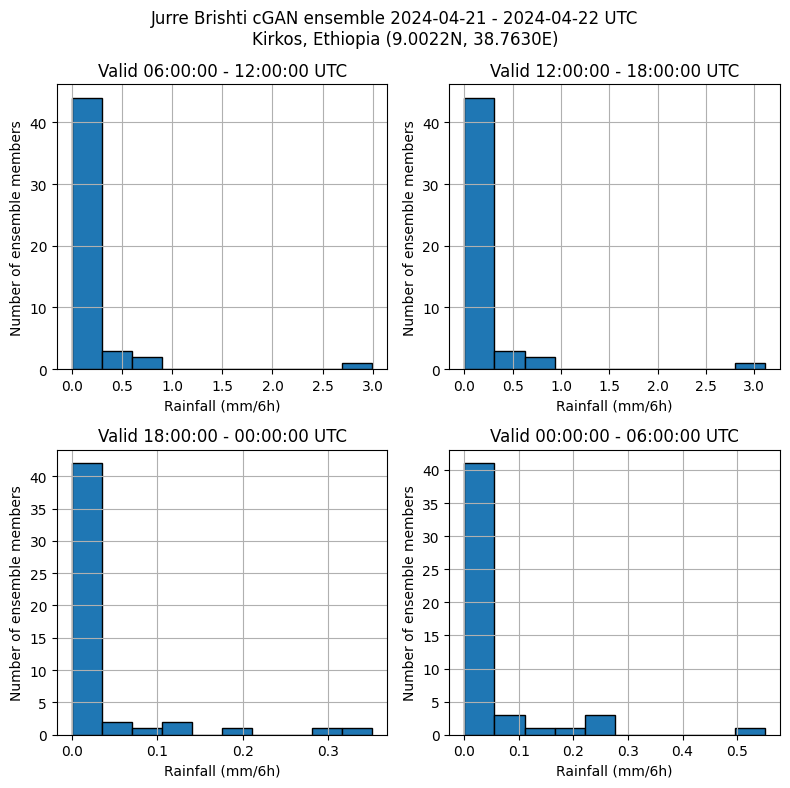

In [11]:
from cgan_ui.show_cgan import plot_GAN_local_histograms

# The location name can be selected from the list returned by print_locations()
# All locations are listed in the file show_forecasts/shapes/locations.py
#   For the case of the same name in different countries, the country can optionally
#   be selected from 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
#   'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'.
# Be carefull. Sometimes there are a few places with the same name.
plot_GAN_local_histograms(data, "Kirkos", country="Ethiopia", plot_units="mm/6h")

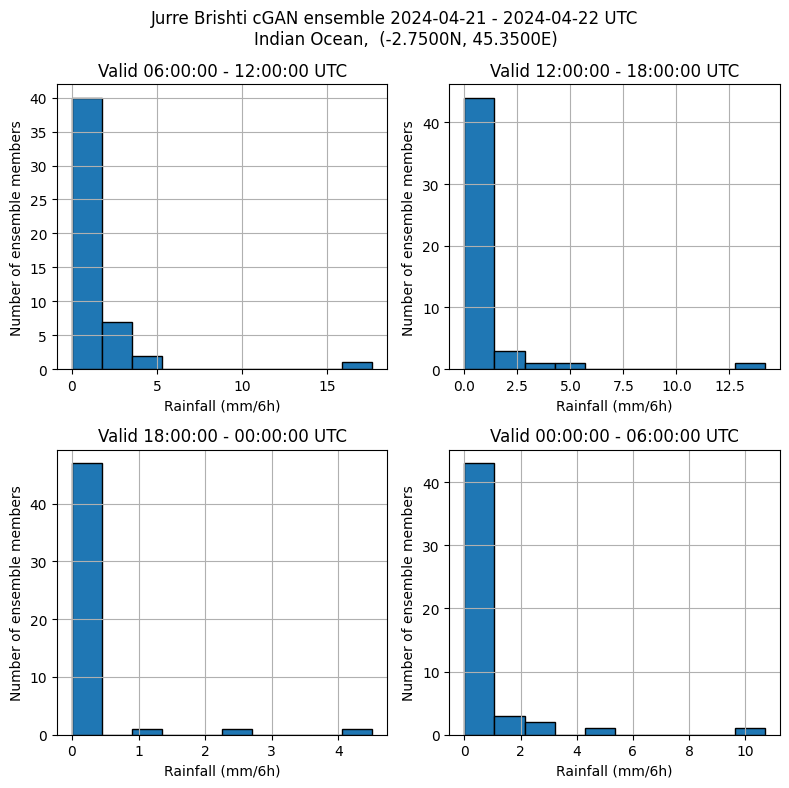

In [12]:
# Or if you want to specify the latitude and longitude, you can call the location what you like
plot_GAN_local_histograms(data, 'Indian Ocean', latitude=-2.75, longitude=45.35, plot_units='mm/6h')

mercury.Checkbox

mercury.Select

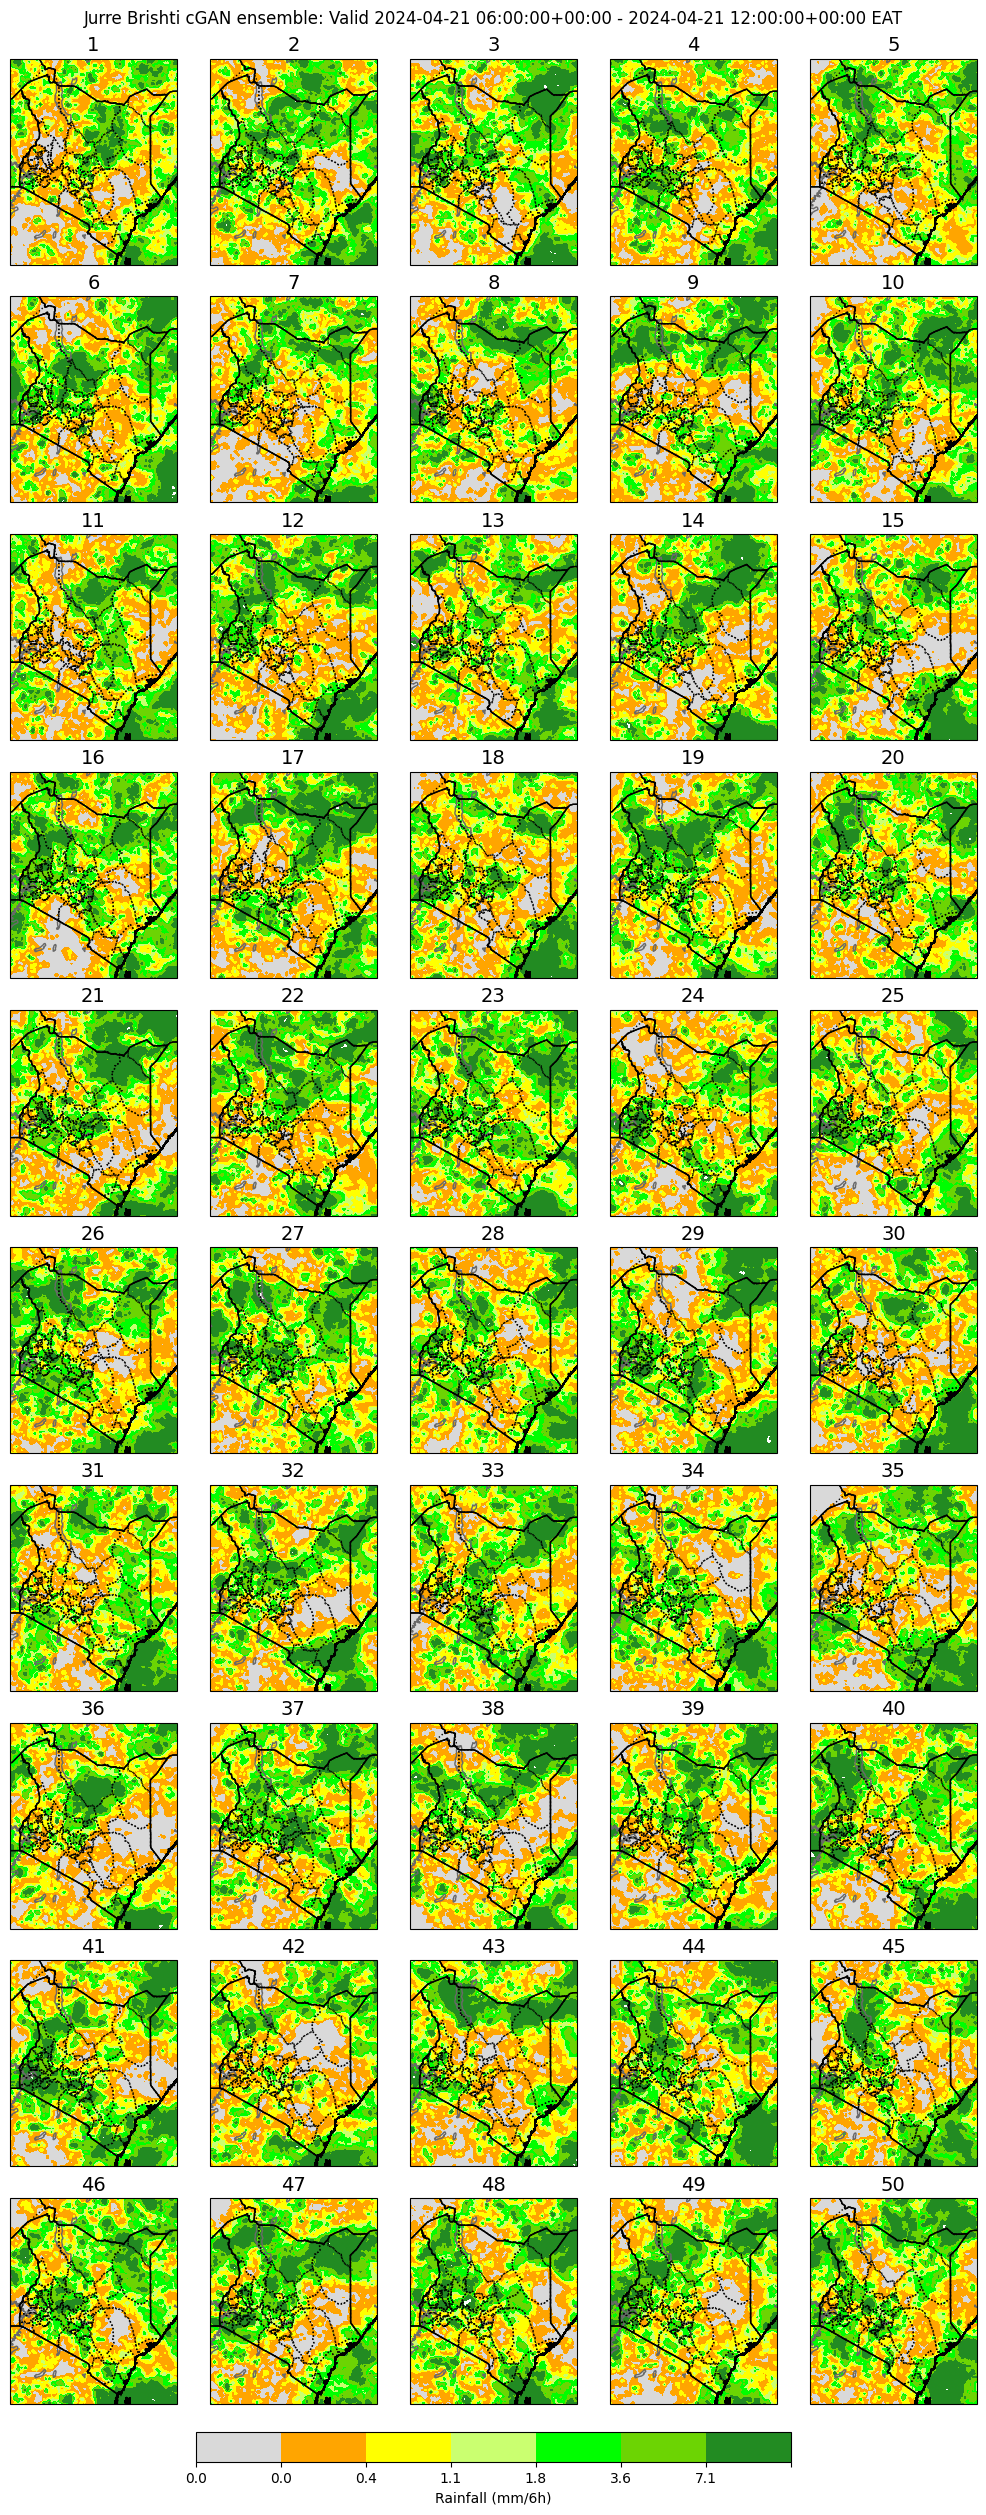

In [13]:
from cgan_ui.show_cgan import plot_GAN_ensemble

show_ensemble = mr.Checkbox(
    value=True,
    label="Visualize Ensemble Members",
    url_key="show_ensemble",
)

if show_ensemble.value:
    ens_valid_start_hour = mr.Select(
        value=VALID_TIME_START_HOUR[1],
        choices=VALID_TIME_START_HOUR[:-1],
        label=f"Ensemble Valid Time Start Hour in {getenv('DEFAULT_TIMEZONE','EAT')}",
        url_key="valid_stat_hour",
    )
    # Plot the full ensemble
    plot_GAN_ensemble(
        data,
        valid_time_start_hour=ens_valid_start_hour.value,
        style=None if color_style.value == "Default" else color_style.value,
        plot_units=accumulation_units.value,
        region=mask_area.value,
    )